In [1]:
import yfinance as yf
import pandas as pd
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker = input('Type in the ticker of the stock: ')

Type in the ticker of the stock: AAPL


In [3]:
start_date = input('Start date (YYYY-MM-DD): ')
end_date = input('End date (YYYY-MM-DD): ')

Start date (YYYY-MM-DD): 2021-01-01
End date (YYYY-MM-DD): 2022-12-31


In [4]:
data = yf.download(ticker,start_date,end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.503624,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080078,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735031,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.991394,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104736,105158200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400


In [5]:
stock_data=data

In [10]:
stock_data=stock_data.reset_index()

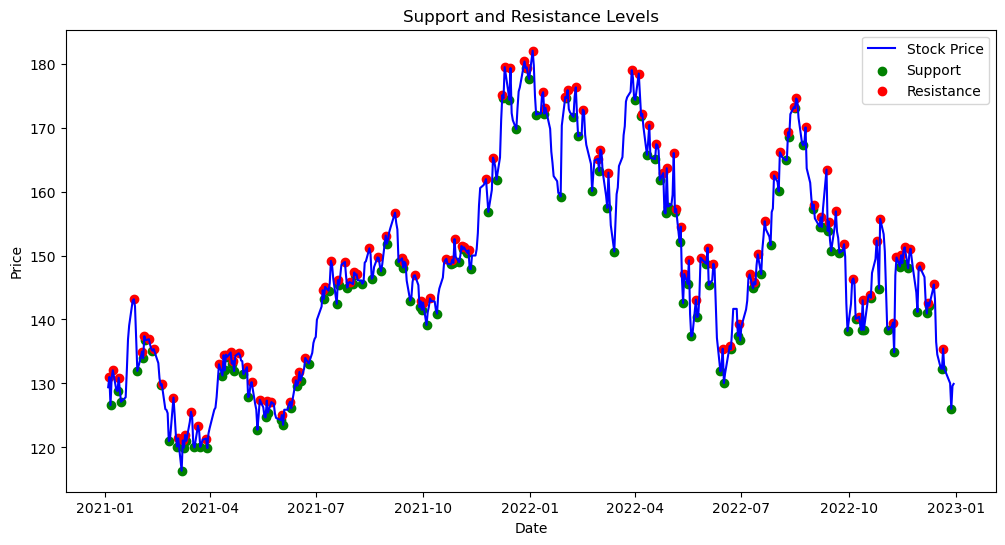

In [11]:
# Find local minima (support levels)
support = stock_data[(stock_data['Close'].shift(1) > stock_data['Close']) & (stock_data['Close'].shift(-1) > stock_data['Close'])]

# Find local maxima (resistance levels)
resistance = stock_data[(stock_data['Close'].shift(1) < stock_data['Close']) & (stock_data['Close'].shift(-1) < stock_data['Close'])]

# Plot the stock prices and support/resistance levels
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
plt.scatter(support['Date'], support['Close'], color='green', label='Support')
plt.scatter(resistance['Date'], resistance['Close'], color='red', label='Resistance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support and Resistance Levels')
plt.legend()
plt.show()


In [12]:
resistance

,Date,Open,High,Low,Close,Adj Close,Volume
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080078,97664900
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104736,105158200
7,2021-01-13,128.759995,131.449997,128.490005,130.889999,128.961823,88636800
15,2021-01-26,143.600006,144.300003,141.369995,143.160004,141.051086,98390600
20,2021-02-02,135.729996,136.309998,134.610001,134.990005,133.001434,83305400
...,...,...,...,...,...,...,...
477,2022-11-23,149.449997,151.830002,149.339996,151.070007,150.631348,58301400
482,2022-12-01,148.210007,149.130005,146.610001,148.309998,147.879349,71250400
487,2022-12-08,142.360001,143.520004,141.100006,142.649994,142.235794,62128300
490,2022-12-13,149.500000,149.970001,144.240005,145.470001,145.047607,93886200


In [13]:
support

,Date,Open,High,Low,Close,Adj Close,Volume
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735031,155088000
6,2021-01-12,128.500000,129.690002,126.860001,128.800003,126.902618,91951100
9,2021-01-15,128.779999,130.220001,127.000000,127.139999,125.267067,111598500
18,2021-01-29,135.830002,136.740005,130.210007,131.960007,130.016083,177523800
21,2021-02-03,135.759995,135.770004,133.610001,133.940002,131.966919,89880900
...,...,...,...,...,...,...,...
480,2022-11-29,144.289993,144.809998,140.350006,141.169998,140.760086,83763800
486,2022-12-07,142.190002,143.369995,140.000000,140.940002,140.530762,69721100
488,2022-12-09,142.339996,145.570007,140.899994,142.160004,141.747223,76097000
495,2022-12-20,131.389999,133.250000,129.889999,132.300003,131.915848,77432800


In [23]:
last_support=support.loc[support.index[-1], 'Adj Close']
last_support

125.67402648925781

In [24]:
last_resistance=resistance.loc[resistance.index[-1], 'Adj Close']
last_resistance

135.0566864013672

In [25]:
last_adj_close=data.loc[data.index[-1], 'Adj Close']
last_adj_close

129.55271911621094

In [30]:
if abs(last_adj_close - last_support) < abs(last_adj_close - last_resistance):
    print(f'Buy, because the last closing price was {last_adj_close} and the last suport {last_support} is closer than the last resistence {last_resistance}')
else:
    print(f'Sell, because the last closing price was {last_adj_close} and the last suport {last_support} is not closer than the last resistence {last_resistance}')

Buy, because the last closing price was 129.55271911621094 and the last suport 125.67402648925781 is closer than the last resistence 135.0566864013672
